# Breast Cancer Prediction - Exploratory Data Analysis

**Author**: @oaPiet  
**GitHub Profile**: [github.com/oaPiet](https://github.com/oaPiet)  
**Project Repository**: [github.com/oaPiet/breast-cancer-diagnosis](https://github.com/oaPiet/breast-cancer-diagnosis)  
**Dataset**: Scikit-learn Breast Cancer Dataset  

**Goal**: Understand data patterns to inform preprocessing and modeling decisions.  
**Why It Matters**: Early detection of breast cancer can significantly improve patient outcomes. This analysis aims to identify key features that differentiate benign and malignant tumors.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [2]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

#### Identify Target Labels

In [3]:
for i in np.unique(dataset.target):
    print(f"Label {i} -> {dataset.target_names[i]}")

Label 0 -> malignant
Label 1 -> benign


### Create the DataFrame from the dataset

In [4]:
breast_cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
breast_cancer_df['target'] = dataset.target
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Check Missing Values

In [5]:
print(breast_cancer_df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


### Check Duplicate Rows

In [6]:
print(breast_cancer_df.duplicated().sum())

0


### Create Labeled Target Column

In [7]:
breast_cancer_df['target_labeled'] = breast_cancer_df['target'].map({0: 'malignant', 1: 'benign'})

### Check Class Distribution

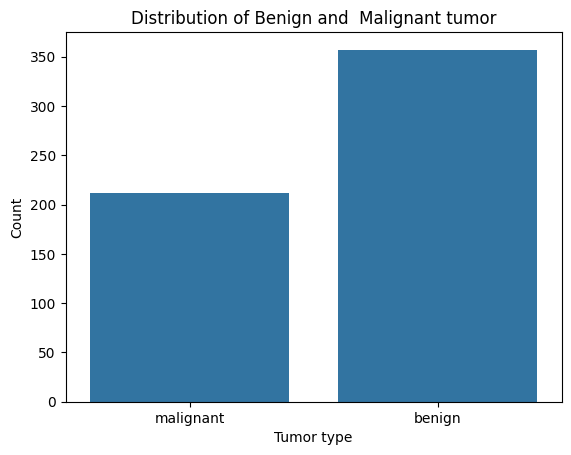

In [8]:
sns.countplot(data=breast_cancer_df, x='target_labeled')
plt.title('Distribution of Benign and  Malignant tumor')
plt.xlabel('Tumor type')
plt.ylabel('Count')
plt.show()

> **Class Distribution**:
> - **Benign**: Approx. 350 samples (**~63%**)
> - **Malignant**: Approx. 200 samples (**~37%**)
>
> While benign cases are more frequent (<70–80% of the data), the dataset is **not severely imbalanced**.  
> This allows us to use **accuracy** as a valid metric, but we’ll still monitor **recall** to ensure malignant tumors aren’t missed.

### Check Correlations between Features and Target

In [9]:
correlation_with_target = breast_cancer_df.corr(numeric_only=True)['target'].sort_values(ascending=False)
print(correlation_with_target)

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

# Selecting Features with Highest Absolute Correlation to the Target

In [10]:
top_features_abs_correlation = correlation_with_target.abs().sort_values(ascending=False).head(10).index
print(top_features_abs_correlation)

Index(['target', 'worst concave points', 'worst perimeter',
       'mean concave points', 'worst radius', 'mean perimeter', 'worst area',
       'mean radius', 'mean area', 'mean concavity'],
      dtype='object')


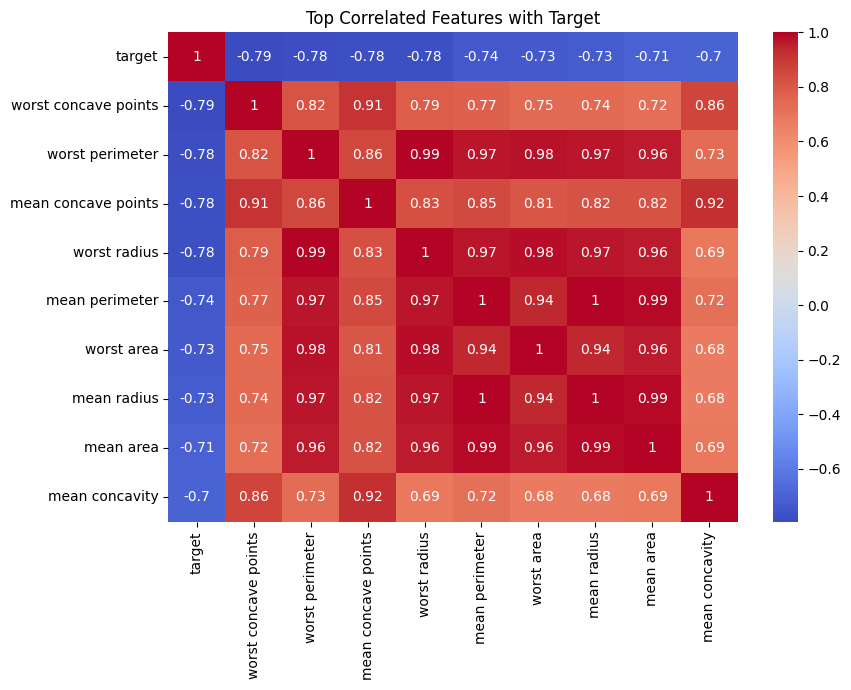

In [11]:
plt.figure(figsize=(9,7))
sns.heatmap(data=breast_cancer_df[top_features_abs_correlation].corr(), annot=True, cmap='coolwarm')
plt.title('Top Correlated Features with Target')
plt.tight_layout()
plt.show()

> The heatmap reveals strong negative correlations with the target variable, particularly for features such as *'worst concave points'* (−0.79), *'worst perimeter'* (−0.78), and *'mean concave points'* (−0.78), indicating that higher values are associated with malignant tumors. Additionally, high inter-feature correlations — such as between *'mean perimeter'* and *'mean radius'* (0.99) — suggest multicollinearity, which can be addressed during modeling using techniques like **L1 regularization** or **feature selection**.

## Visualize Key Features

To better understand the relationships between the most predictive features and the target variable, we'll visualize them using a pairplot. This will help us see how benign and malignant tumors differ across these features.

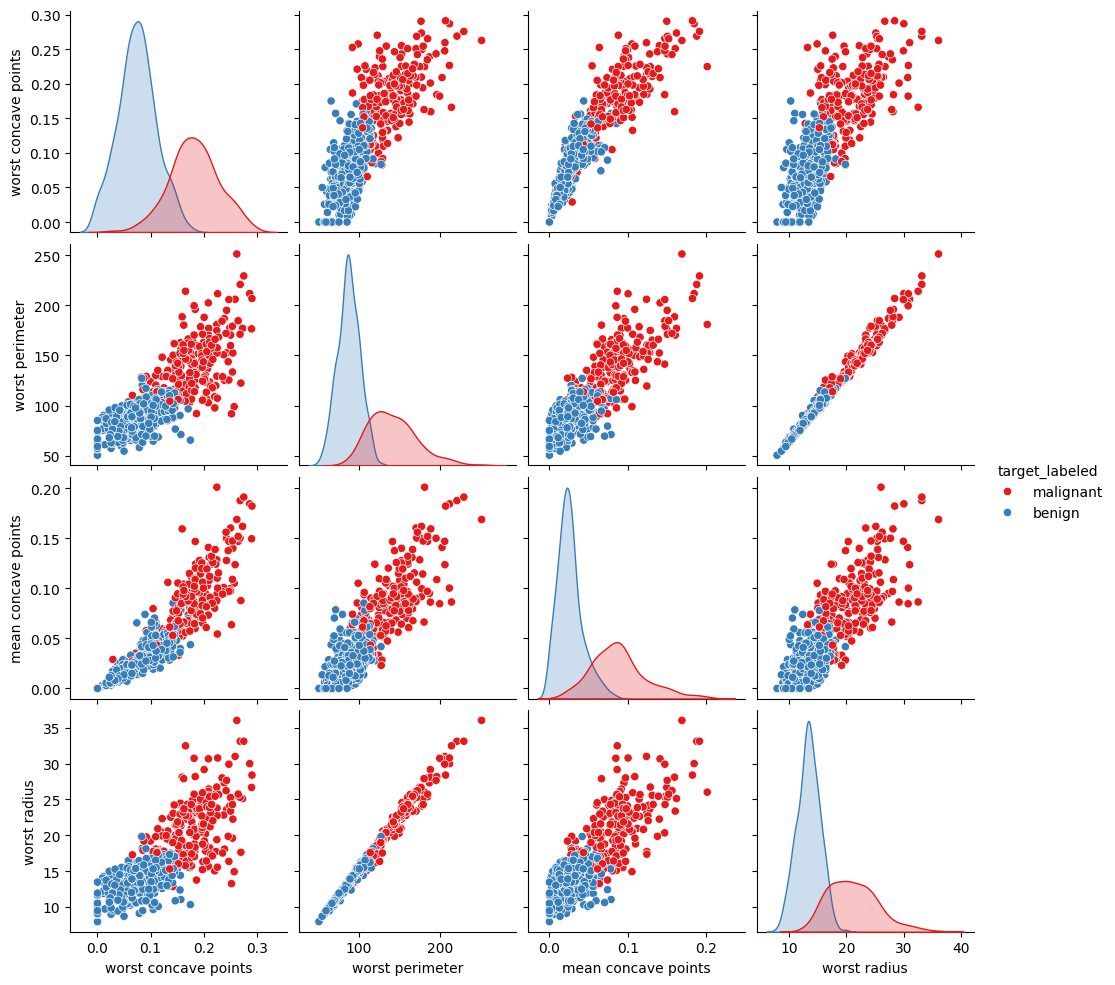

In [12]:
selected_features = ['worst concave points', 'worst perimeter', 'mean concave points', 'worst radius', 'target_labeled']
sns.pairplot(breast_cancer_df[selected_features], hue='target_labeled', palette='Set1')
plt.show()


>**Benign tumors are typically associated with lower values of features** such as *'worst concave points'*, *'worst perimeter'*, and *'worst radius'*, **whereas higher values in these same features are strong indicators of malignancy.**

# Boxplots (for outliers and distribution)

Boxplots provide a clear view of the distribution and spread of key features across benign and malignant tumors. These plots highlight differences in central tendency (median) and variability (IQR).

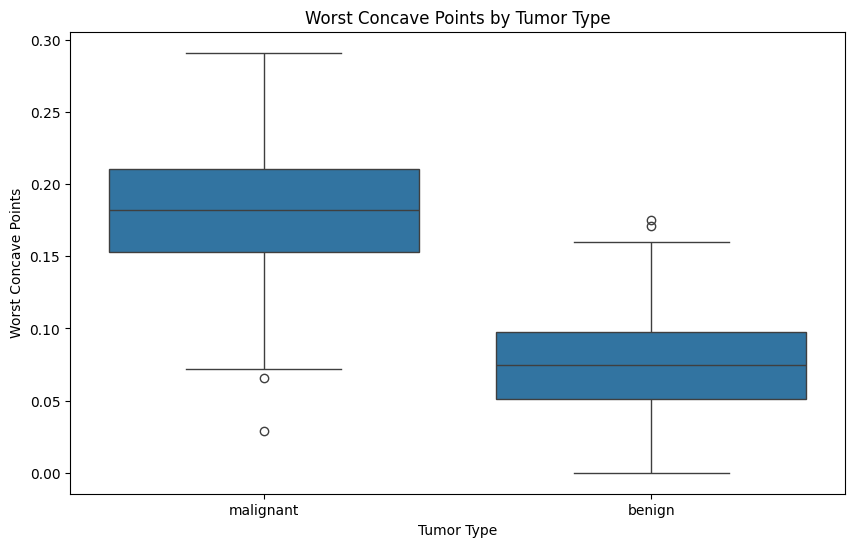

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=breast_cancer_df, x='target_labeled', y='worst concave points')
plt.title('Worst Concave Points by Tumor Type')
plt.xlabel('Tumor Type')
plt.ylabel('Worst Concave Points')
plt.show()

>Benign tumors have a lower median and show less variance in *'worst concave points'* compared to malignant tumors.

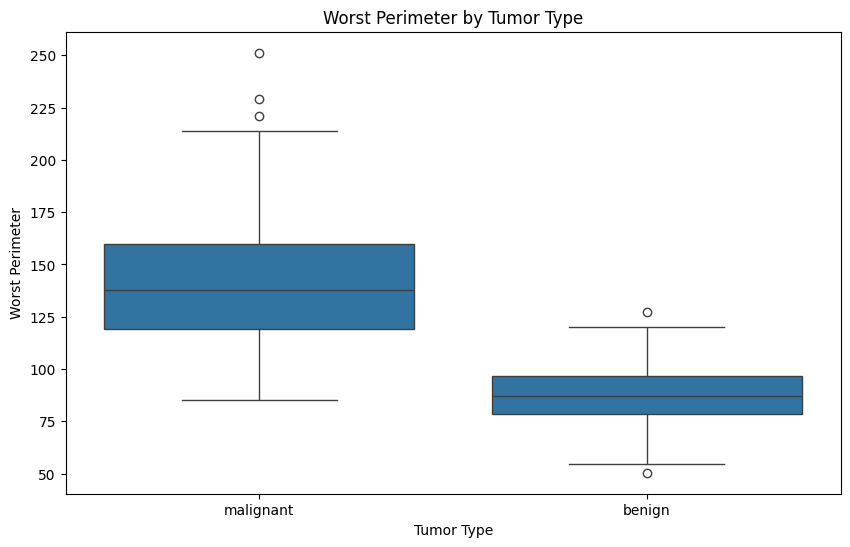

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=breast_cancer_df, x='target_labeled', y='worst perimeter')
plt.title('Worst Perimeter by Tumor Type')
plt.xlabel('Tumor Type')
plt.ylabel('Worst Perimeter')
plt.show()

>Benign tumors have a lower median and show less variance in *'worst perimeter'* compared to malignant tumors.

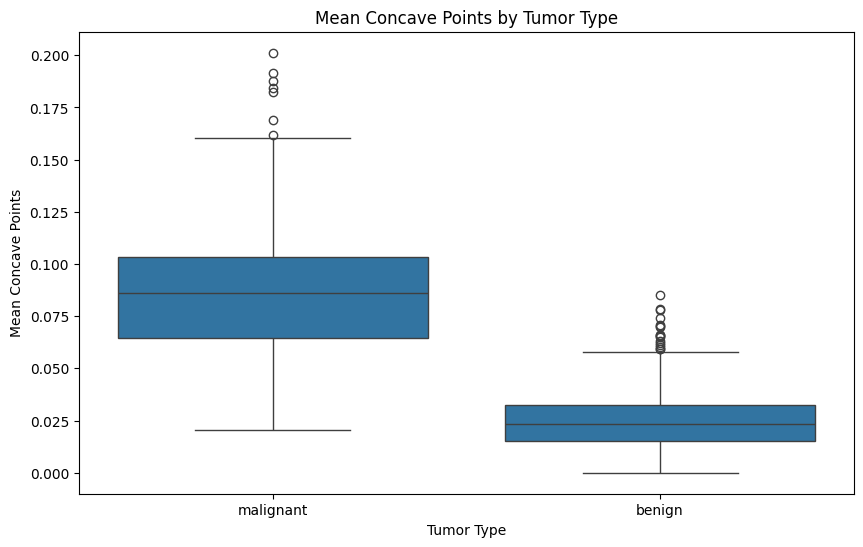

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=breast_cancer_df, x='target_labeled', y='mean concave points')
plt.title('Mean Concave Points by Tumor Type')
plt.xlabel('Tumor Type')
plt.ylabel('Mean Concave Points')
plt.show()

>Benign tumors have a lower median and show less variance in *'mean concave points'* compared to malignant tumors.

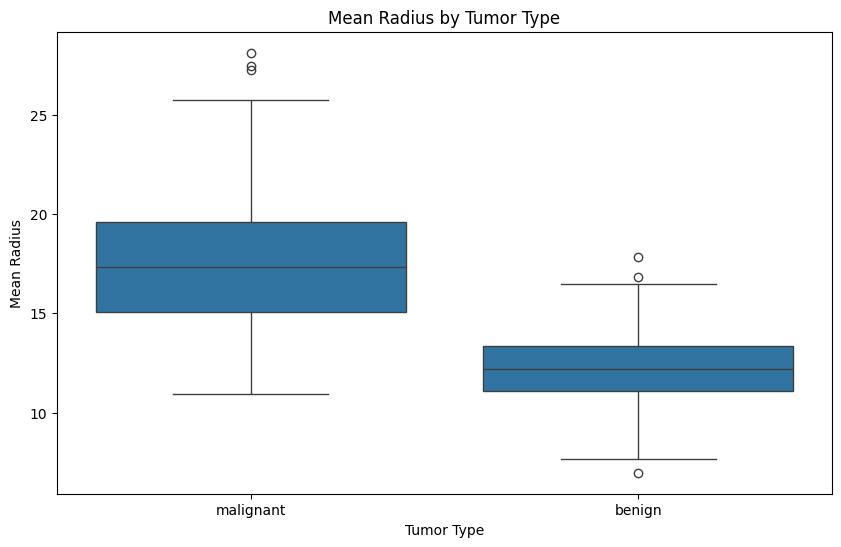

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=breast_cancer_df, x='target_labeled', y='mean radius')
plt.title('Mean Radius by Tumor Type')
plt.xlabel('Tumor Type')
plt.ylabel('Mean Radius')
plt.show()

>Benign tumors have a lower median and show less variance in *'mean radius'* compared to malignant tumors.